In [1]:
!pip install seaborn


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv("output.csv")
pivoted_df = df.pivot_table(index='FirmID', columns=df.groupby('FirmID').cumcount()+1, values='output')
# rename the columns to indicate the day number
num_days = pivoted_df.shape[1]
pivoted_df.columns = [f"day{i}" for i in range(1, num_days+1)]

# reset the index to make FirmID a regular column
pivoted_df.reset_index(inplace=True)



In [5]:
firm_list= df['FirmID'].unique()
firm_list

array([3792700, 4954711, 8873834, 7914532, 7241539], dtype=int64)

In [6]:
pivoted_df

,FirmID,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day91,day92,day93,day94,day95,day96,day97,day98,day99,day100
0,3792700,67.000000,65.000000,62.000000,61.000000,65.000000,62.000000,70.000000,68.000000,64.000000,...,251.000000,263.000000,269.000000,263.000000,260.000000,267.000000,279.000000,280.000000,278.000000,280.000000
1,4954711,90.928103,90.976936,97.440356,109.633255,116.181828,126.861924,121.636699,124.049174,131.812502,...,306.558899,316.579442,319.890337,324.280179,331.024101,334.405869,343.334217,347.194228,350.668371,358.612136
2,7241539,462.571223,466.613682,463.020444,471.946748,453.670262,459.113996,449.220437,462.149138,465.631532,...,262.673087,241.600103,227.002801,208.534317,194.243636,168.787997,148.279909,148.962412,139.977195,129.093350
3,7914532,163.181845,158.724063,168.233438,180.496479,185.645663,179.002383,174.423695,166.675342,175.666710,...,261.526507,262.584497,267.595462,271.789274,281.509422,288.248817,291.938430,290.001476,288.837128,286.483528
4,8873834,256.088770,259.419592,254.630537,260.287324,255.842333,272.699491,272.822072,275.766720,264.109171,...,369.282223,364.404261,372.908110,371.849205,373.377572,380.922178,380.767188,376.465805,377.935427,378.422254


TypeError: 'bool' object is not iterable

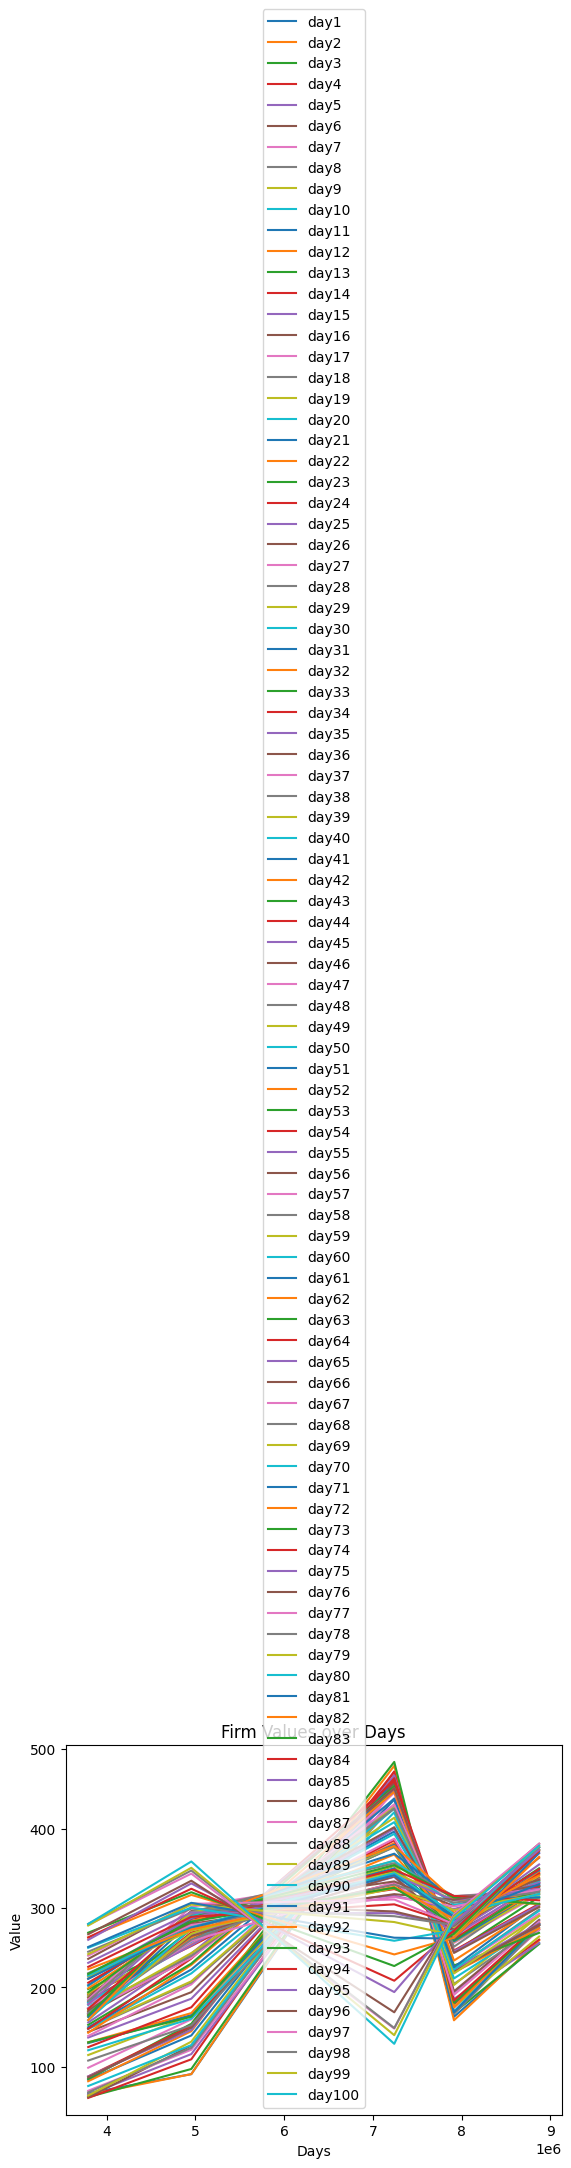

In [7]:
import matplotlib.pyplot as plt
pivoted_df.set_index('FirmID', inplace=True)

# plot the line chart
pivoted_df.plot(kind='line')

# add labels and title
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Firm Values over Days')
plt.legend(False)

# display the chart
plt.show()

In [45]:
pivoted_df.columns


Index(['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'day8', 'day9',
       'day10', 'day11', 'day12', 'day13', 'day14', 'day15', 'day16', 'day17',
       'day18', 'day19', 'day20', 'day21', 'day22', 'day23', 'day24', 'day25',
       'day26', 'day27', 'day28', 'day29', 'day30', 'day31', 'day32', 'day33',
       'day34', 'day35', 'day36', 'day37', 'day38', 'day39', 'day40', 'day41',
       'day42', 'day43', 'day44', 'day45', 'day46', 'day47', 'day48', 'day49',
       'day50', 'day51', 'day52', 'day53', 'day54', 'day55', 'day56', 'day57',
       'day58', 'day59', 'day60', 'day61', 'day62', 'day63', 'day64', 'day65',
       'day66', 'day67', 'day68', 'day69', 'day70', 'day71', 'day72', 'day73',
       'day74', 'day75', 'day76', 'day77', 'day78', 'day79', 'day80', 'day81',
       'day82', 'day83', 'day84', 'day85', 'day86', 'day87', 'day88', 'day89',
       'day90', 'day91', 'day92', 'day93', 'day94', 'day95', 'day96', 'day97',
       'day98', 'day99', 'day100'],
      dtype='obj

array([8825377, 7462961, 4879113, 5777400, 3583229, 6793356, 5484178,
       2354886, 3247172, 2424697, 7268990, 3093890, 3932994, 3129214,
       2210487, 5753782, 2328584, 8680400, 7706502, 8036590, 8781943,
       4700678, 5967039, 5994580, 2358290, 7417024, 5921181, 3458698,
       7847291, 2508846, 6583100, 3488361, 6083373, 5897060, 6197226,
       3841615, 5751616, 6817905, 7011990, 6302908, 4053967, 7334867,
       7152149, 2163295, 2044989, 7537623, 5847133, 4968039, 5019625,
       8112970, 5645913, 2261535, 6626068, 2316221, 2050055, 2234298,
       8727595, 3592926, 7828927, 5737477, 8207270, 3819794, 3994240,
       7765947, 2725845, 2276439, 4032441, 5893096, 2227443, 6482062],
      dtype=int64)

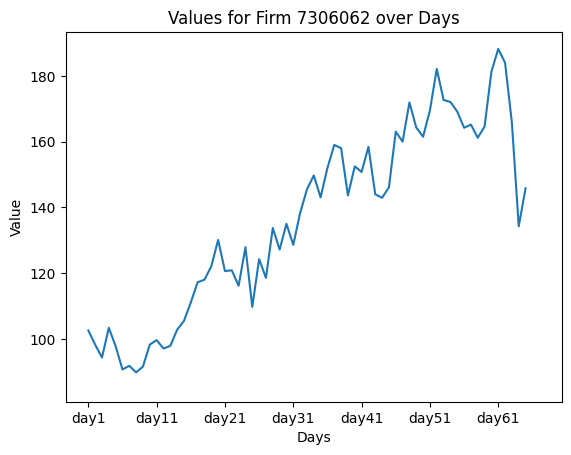

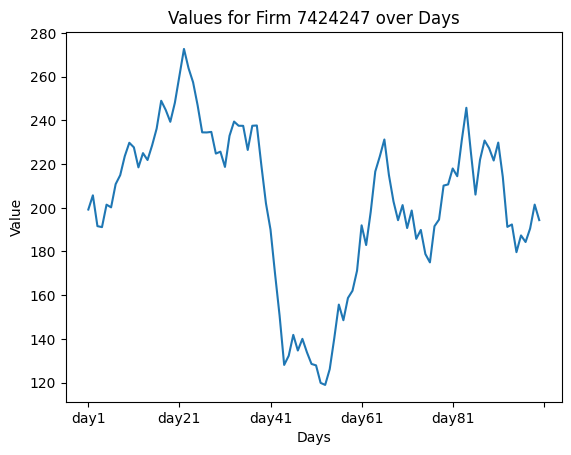

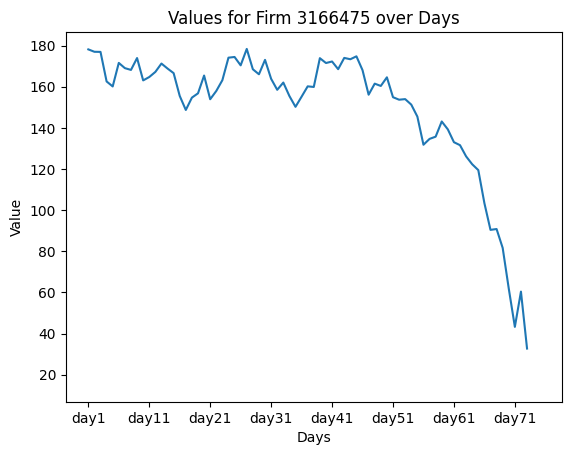

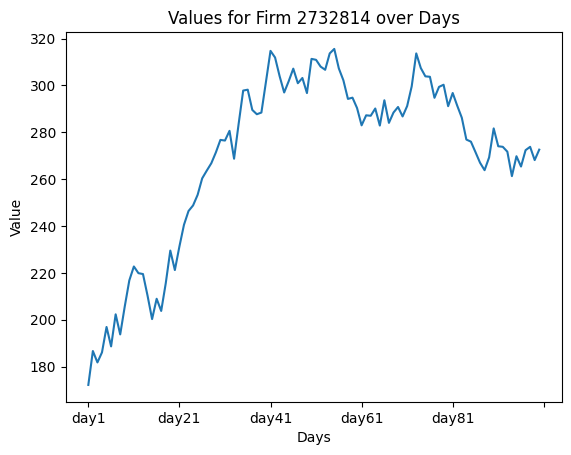

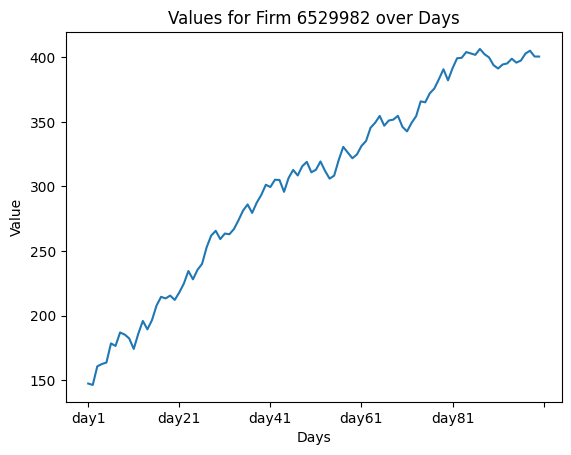

In [9]:
for i in firm_list:   
    firm_data = pivoted_df.loc[i]

    # plot the line chart
    firm_data.plot(kind='line')

    # add labels and title
    plt.xlabel('Days')
    plt.ylabel('Value')
    plt.title(f'Values for Firm {i} over Days')

    # display the chart
    plt.show()

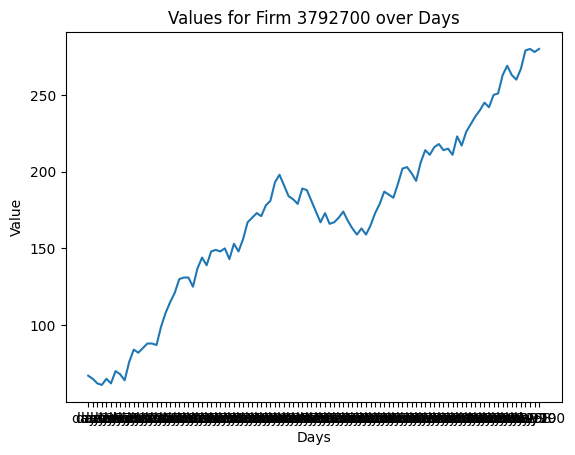

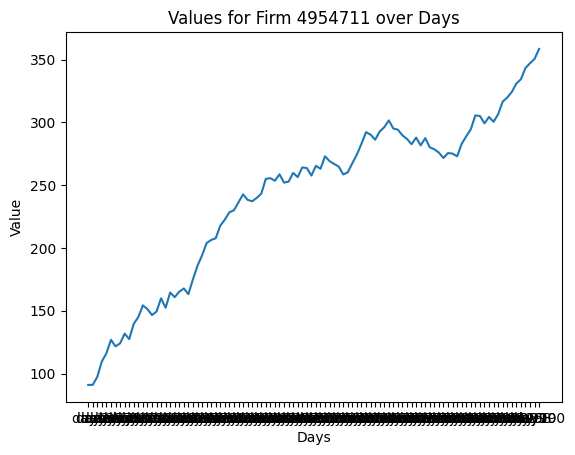

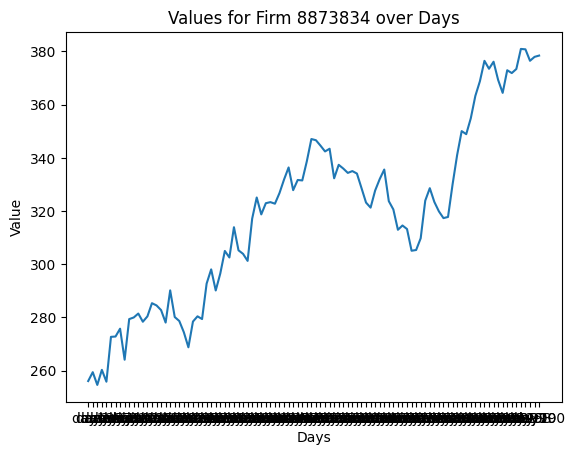

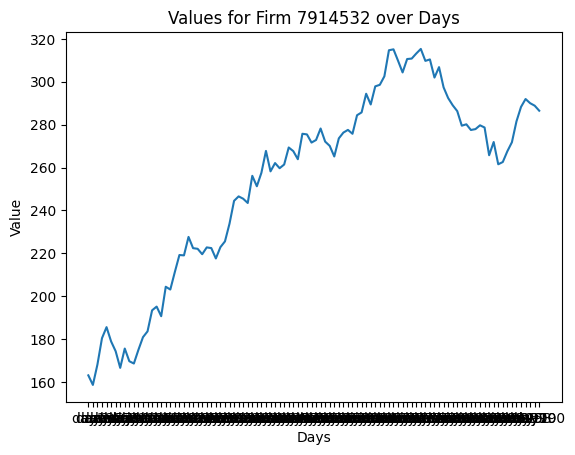

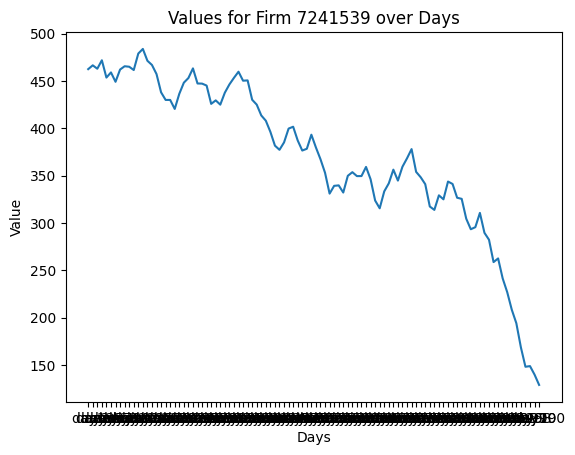

In [8]:
for i in firm_list:   
    firm_data = pivoted_df.loc[i]
#plot the line chart using Seaborn
    sns.lineplot(data=firm_data)

# add labels and title
    plt.xlabel('Days')
    plt.ylabel('Value')
    plt.title(f'Values for Firm {i} over Days')

# display the chart
    plt.show()
